In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/USER ACCOUNT/Downloads/Loan approval data set (ml).csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape
df.info
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Dropping unnecesary cell

In [4]:
df=df.drop(["loan_id"],axis=1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Encoding the cell-it changes the categorical labels into numeric forms 

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

In [6]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


0 means approved and 1 means rejected=loan
0 means Graduate and 1 means Not graduate=education
0 means No and 1 means yes = self employed 

In [7]:
df.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.000000,2.498712,1.695910,0.000000,1.000000,3.000000,4.000000,5.000000
education,4269.000000,0.497775,0.500054,0.000000,0.000000,0.000000,1.000000,1.000000
self_employed,4269.000000,0.503631,0.500045,0.000000,0.000000,1.000000,1.000000,1.000000
income_annum,4269.000000,5059123.916608,2806839.831818,200000.000000,2700000.000000,5100000.000000,7500000.000000,9900000.000000
loan_amount,4269.000000,15133450.456781,9043362.984843,300000.000000,7700000.000000,14500000.000000,21500000.000000,39500000.000000
loan_term,4269.000000,10.900445,5.709187,2.000000,6.000000,10.000000,16.000000,20.000000
cibil_score,4269.000000,599.936051,172.430401,300.000000,453.000000,600.000000,748.000000,900.000000
residential_assets_value,4269.000000,7472616.537831,6503636.587664,-100000.000000,2200000.000000,5600000.000000,11300000.000000,29100000.000000
commercial_assets_value,4269.000000,4973155.305692,4388966.089638,0.000000,1300000.000000,3700000.000000,7600000.000000,19400000.000000
luxury_assets_value,4269.000000,15126305.926446,9103753.665256,300000.000000,7500000.000000,14600000.000000,21700000.000000,39200000.000000


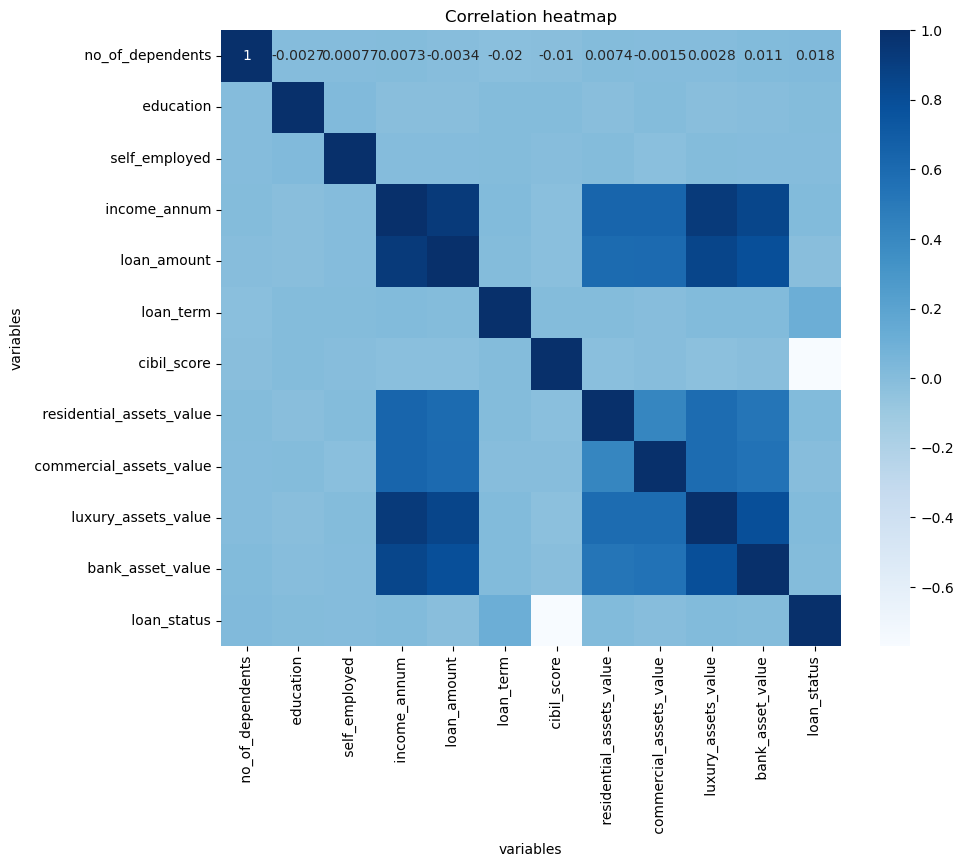

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title("Correlation heatmap")
plt.xlabel("variables")
plt.ylabel("variables")

plt.show()


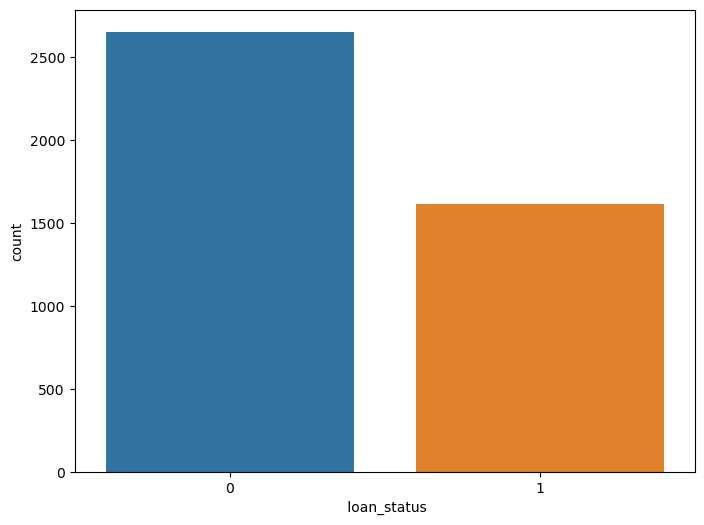

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" loan_status")
plt.show()

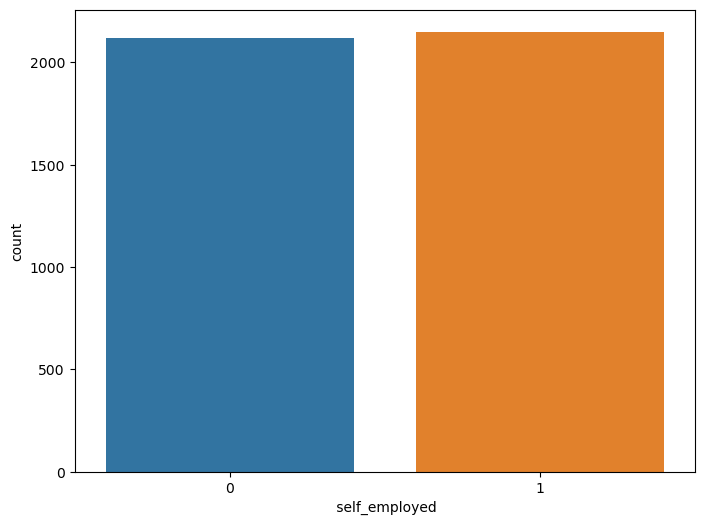

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" self_employed")
plt.show()

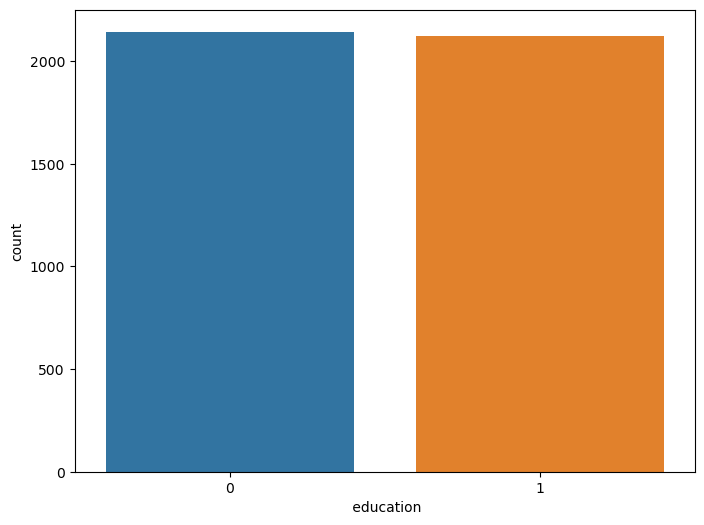

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" education")
plt.show()

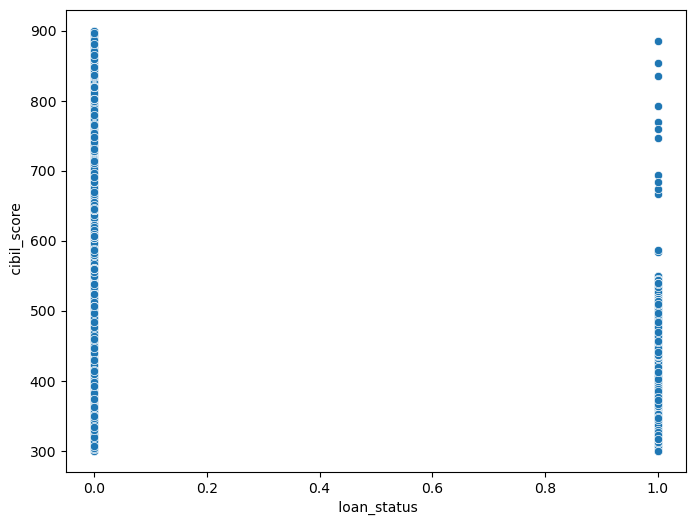

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(df,x=" loan_status",y=" cibil_score")
plt.show()

In [13]:

x=df.drop([" loan_status"],axis=1)
y=df[" loan_status"]
from sklearn.model_selection import train_test_split # type: ignore
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

##Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       524
           1       0.86      0.02      0.04       330

    accuracy                           0.62       854
   macro avg       0.74      0.51      0.40       854
weighted avg       0.71      0.62      0.48       854

Accuracy of Logistic Regression is :  61.94379391100703


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,regpred))
print("Mean Squared Error:", mean_squared_error(y_test,regpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score:", r2_score(y_test,regpred))


Mean Absolute Error: 0.3805620608899297
Mean Squared Error: 0.3805620608899297
Root Mean Squared Error: 0.6168971234249109
R2 Score: -0.6050774924820728


Decision Tree

In [16]:
from sklearn import tree
dtree= tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred= dtree.predict(x_test)
print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree:",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       524
           1       0.97      0.99      0.98       330

    accuracy                           0.98       854
   macro avg       0.98      0.99      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree: 98.47775175644028


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error:", mean_squared_error(y_test,dtreepred))
print("Root Mean rooted error:", np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Square:", r2_score(y_test,dtreepred))

Mean Absolute Error: 0.01522248243559719
Mean Squared Error: 0.01522248243559719
Root Mean rooted error: 0.12337942468498217
R2 Square: 0.935796900300717


Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)#the model will create 100 decision trees and use them collectively to get prediction
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
print(classification_report(y_test,rfpred))
print("Accuracy of RandomForest:",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       524
           1       0.98      0.98      0.98       330

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of RandomForest: 98.47775175644028


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test,rfpred))
print("Mean Squared Error:",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Square:", r2_score(y_test,rfpred))

Mean Absolute Error: 0.01522248243559719
Mean Squared Error: 0.01522248243559719
Root Mean Squared Error: 0.12337942468498217
R2 Square: 0.935796900300717


Comapring Models on the basis of its perfromance 

<function matplotlib.pyplot.show(close=None, block=None)>

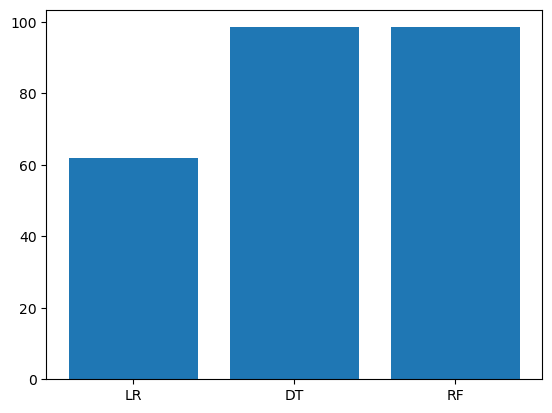

In [20]:

LR=accuracy_score(y_test,regpred)*100
DT=accuracy_score(y_test,dtreepred)*100
RF=accuracy_score(y_test,rfpred)*100
Model=['LR','DT','RF']
Score=[LR,DT,RF]
barplot=plt.bar(x=Model,height=Score)
plt.show

Features Importance 

In [21]:
importances=rf.feature_importances_
feature_importances=pd.DataFrame({"features":x.columns,"importance":importances})
feature_importances= feature_importances.sort_values('importance',ascending=False)
print(feature_importances)

                     features  importance
6                 cibil_score    0.815306
5                   loan_term    0.057081
4                 loan_amount    0.028242
3                income_annum    0.018703
9         luxury_assets_value    0.018454
8     commercial_assets_value    0.017383
7    residential_assets_value    0.017307
10           bank_asset_value    0.014419
0            no_of_dependents    0.008128
2               self_employed    0.002669
1                   education    0.002308


From the above table we can see that Cibil score is one of the major feature which decides whether the loan should be approved or not.

##Converting it to a web application 

In [22]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


In [23]:
import streamlit as st
import joblib
import numpy as np

# Load the saved Random Forest model
rf_model = joblib.load("random_forest_model.pkl")

# Define the app title
st.title("Loan Approval Prediction App (Random Forest)")

# User input for features
def get_user_input():
    no_of_dependents = st.number_input("Number of Dependents", min_value=0, max_value=10, step=1)
    education = st.selectbox("Education", ("Graduate", "Not Graduate"))
    self_employed = st.selectbox("Self Employed", ("Yes", "No"))
    income_annum = st.number_input("Annual Income (in currency)")
    loan_amount = st.number_input("Loan Amount")
    loan_term = st.number_input("Loan Term")
    cibil_score = st.number_input("CIBIL Score", min_value=300, max_value=900)
    residential_assets_value = st.number_input("Residential Assets Value")
    commercial_assets_value = st.number_input("Commercial Assets Value")
    luxury_assets_value = st.number_input("Luxury Assets Value")
    bank_asset_value = st.number_input("Bank Asset Value")

    # Encoding categorical variables
    education = 1 if education == "Graduate" else 0
    self_employed = 1 if self_employed == "Yes" else 0

    # Feature array
    features = np.array([[no_of_dependents, education, self_employed, income_annum, loan_amount,
                          loan_term, cibil_score, residential_assets_value, commercial_assets_value,
                          luxury_assets_value, bank_asset_value]])
    return features

# Predict function
def predict(features):
    prediction = rf_model.predict(features)
    return "Approved" if prediction[0] == 1 else "Rejected"

# Main section for user input and prediction
st.header("Enter Loan Details:")
user_input = get_user_input()

# Predict button
if st.button("Predict Loan Status"):
    result = predict(user_input)
    st.subheader(f"Loan Status: {result}")


2024-10-25 13:56:01.403 
  command:

    streamlit run c:\Users\USER ACCOUNT\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [24]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [ ]:
streamlit run app_rf.py



NameError: name 'streamlit' is not defined